In [1]:
import requests
import pandas as pd

def gather_team_data(team_id):

    url = "https://www.balldontlie.io/api/v1/games"
    params = {
        'seasons[]': ['2015', '2016', '2017'],
        'team_ids[]': [str(team_id)],  
        'per_page': '100', 
    }

    all_games = []
    page = 0

    while True:
        params['page'] = page
        # Sending a GET request to the URL
        response = requests.get(url, params=params)

    
        if response.status_code != 200:
            print(f"Failed to retrieve data: {response.status_code}")
            break
        
        # Parsing the JSON response
        data = response.json()
        
        # Add the retrieved games to the all_games list
        all_games.extend(data['data'])

        # This checks for there are more pages to retrieve for the requested team
        if data['meta']['next_page']:
            page += 1
        else:
            break
    
    return all_games  


cavaliers_games = gather_team_data(6)


cavaliers_df = pd.json_normalize(cavaliers_games)

cavaliers_df

,id,date,home_team_score,period,postseason,season,status,time,visitor_team_score,home_team.id,...,home_team.division,home_team.full_name,home_team.name,visitor_team.id,visitor_team.abbreviation,visitor_team.city,visitor_team.conference,visitor_team.division,visitor_team.full_name,visitor_team.name
0,27302,2015-12-05T00:00:00.000Z,99,4,False,2015,Final,,84,16,...,Southeast,Miami Heat,Heat,6,CLE,Cleveland,East,Central,Cleveland Cavaliers,Cavaliers
1,27409,2015-12-17T00:00:00.000Z,104,4,False,2015,Final,,100,6,...,Central,Cleveland Cavaliers,Cavaliers,21,OKC,Oklahoma City,West,Northwest,Oklahoma City Thunder,Thunder
2,27417,2015-12-25T00:00:00.000Z,89,4,False,2015,Final,,83,10,...,Pacific,Golden State Warriors,Warriors,6,CLE,Cleveland,East,Central,Cleveland Cavaliers,Cavaliers
3,27419,2015-12-28T00:00:00.000Z,97,4,False,2015,Final,,101,24,...,Pacific,Phoenix Suns,Suns,6,CLE,Cleveland,East,Central,Cleveland Cavaliers,Cavaliers
4,27424,2016-01-04T00:00:00.000Z,122,4,False,2015,Final,,100,6,...,Central,Cleveland Cavaliers,Cavaliers,28,TOR,Toronto,East,Atlantic,Toronto Raptors,Raptors
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
402,33301,2018-05-27T00:00:00.000Z,79,4,True,2017,Final,,87,2,...,Atlantic,Boston Celtics,Celtics,6,CLE,Cleveland,East,Central,Cleveland Cavaliers,Cavaliers
403,33719,2018-05-31T00:00:00.000Z,124,4,True,2017,Final,,114,10,...,Pacific,Golden State Warriors,Warriors,6,CLE,Cleveland,East,Central,Cleveland Cavaliers,Cavaliers
404,33720,2018-06-03T00:00:00.000Z,122,4,True,2017,Final,,103,10,...,Pacific,Golden State Warriors,Warriors,6,CLE,Cleveland,East,Central,Cleveland Cavaliers,Cavaliers
405,33721,2018-06-06T00:00:00.000Z,102,4,True,2017,Final,,110,6,...,Central,Cleveland Cavaliers,Cavaliers,10,GSW,Golden State,West,Pacific,Golden State Warriors,Warriors


In [2]:
# Add outcome column with win/loss
cavaliers_df['outcome'] = cavaliers_df.apply(lambda x: 'WIN' if x['home_team.id'] == 6 and x['home_team_score'] > x['visitor_team_score'] or x['visitor_team.id'] == 6 and x['visitor_team_score'] > x['home_team_score'] else 'LOSS', axis=1)
cavaliers_df

,id,date,home_team_score,period,postseason,season,status,time,visitor_team_score,home_team.id,...,home_team.full_name,home_team.name,visitor_team.id,visitor_team.abbreviation,visitor_team.city,visitor_team.conference,visitor_team.division,visitor_team.full_name,visitor_team.name,outcome
0,27302,2015-12-05T00:00:00.000Z,99,4,False,2015,Final,,84,16,...,Miami Heat,Heat,6,CLE,Cleveland,East,Central,Cleveland Cavaliers,Cavaliers,LOSS
1,27409,2015-12-17T00:00:00.000Z,104,4,False,2015,Final,,100,6,...,Cleveland Cavaliers,Cavaliers,21,OKC,Oklahoma City,West,Northwest,Oklahoma City Thunder,Thunder,WIN
2,27417,2015-12-25T00:00:00.000Z,89,4,False,2015,Final,,83,10,...,Golden State Warriors,Warriors,6,CLE,Cleveland,East,Central,Cleveland Cavaliers,Cavaliers,LOSS
3,27419,2015-12-28T00:00:00.000Z,97,4,False,2015,Final,,101,24,...,Phoenix Suns,Suns,6,CLE,Cleveland,East,Central,Cleveland Cavaliers,Cavaliers,WIN
4,27424,2016-01-04T00:00:00.000Z,122,4,False,2015,Final,,100,6,...,Cleveland Cavaliers,Cavaliers,28,TOR,Toronto,East,Atlantic,Toronto Raptors,Raptors,WIN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
402,33301,2018-05-27T00:00:00.000Z,79,4,True,2017,Final,,87,2,...,Boston Celtics,Celtics,6,CLE,Cleveland,East,Central,Cleveland Cavaliers,Cavaliers,WIN
403,33719,2018-05-31T00:00:00.000Z,124,4,True,2017,Final,,114,10,...,Golden State Warriors,Warriors,6,CLE,Cleveland,East,Central,Cleveland Cavaliers,Cavaliers,LOSS
404,33720,2018-06-03T00:00:00.000Z,122,4,True,2017,Final,,103,10,...,Golden State Warriors,Warriors,6,CLE,Cleveland,East,Central,Cleveland Cavaliers,Cavaliers,LOSS
405,33721,2018-06-06T00:00:00.000Z,102,4,True,2017,Final,,110,6,...,Cleveland Cavaliers,Cavaliers,10,GSW,Golden State,West,Pacific,Golden State Warriors,Warriors,LOSS


In [3]:
# Add latitude and longitude columns
team_coordinates = {
    'Atlanta': (33.757290, -84.397331),
    'Boston': (42.366291, -71.062630),
    'Brooklyn': (40.682732, -73.975876),
    'Charlotte': (35.2271, -80.8431),
    'Chicago': (41.880692, -87.674370),
    'Cleveland': (41.496389, -81.688056),
    'Dallas': (32.790527, -96.810883),
    'Denver': (39.748920, -105.008400),
    'Detroit': (42.341111, -83.055000),
    'Golden State': (37.768056, -122.387500),
    'Houston': (29.750833, -95.362222),
    'Indiana': (39.763889, -86.155556),
    'LA': (34.043087, -118.267616),
    'Los Angeles': (34.043087, -118.267616),
    'Memphis': (35.138056, -90.050556),
    'Miami': (25.781441, -80.188332),
    'Milwaukee': (43.0389, -87.9065),
    'Minnesota': (44.979444, -93.276111),
    'New Orleans': (29.949167, -90.081944),
    'New York': (40.750556, -73.993611),
    'Orlando': (28.539167, -81.383611),
    'Oklahoma City': (35.4634, -97.5151),
    'Philadelphia': (39.901111, -75.171944),
    'Phoenix': (33.445833, -112.071389),
    'Portland': (45.531944, -122.666667),
    'Sacramento': (38.5816, -121.4944),
    'San Antonio': (29.426944, -98.437500),
    'Toronto': (43.643475, -79.379379),
    'Utah': (40.7608, -111.8910),
    'Washington': (38.898129, -77.021172),
}

# For regular season
cavaliers_df['latitude'] = cavaliers_df['home_team.city'].map(lambda x: team_coordinates[x][0] if x in team_coordinates else None)
cavaliers_df['longitude'] = cavaliers_df['home_team.city'].map(lambda x: team_coordinates[x][1] if x in team_coordinates else None)

cavaliers_df

,id,date,home_team_score,period,postseason,season,status,time,visitor_team_score,home_team.id,...,visitor_team.id,visitor_team.abbreviation,visitor_team.city,visitor_team.conference,visitor_team.division,visitor_team.full_name,visitor_team.name,outcome,latitude,longitude
0,27302,2015-12-05T00:00:00.000Z,99,4,False,2015,Final,,84,16,...,6,CLE,Cleveland,East,Central,Cleveland Cavaliers,Cavaliers,LOSS,25.781441,-80.188332
1,27409,2015-12-17T00:00:00.000Z,104,4,False,2015,Final,,100,6,...,21,OKC,Oklahoma City,West,Northwest,Oklahoma City Thunder,Thunder,WIN,41.496389,-81.688056
2,27417,2015-12-25T00:00:00.000Z,89,4,False,2015,Final,,83,10,...,6,CLE,Cleveland,East,Central,Cleveland Cavaliers,Cavaliers,LOSS,37.768056,-122.387500
3,27419,2015-12-28T00:00:00.000Z,97,4,False,2015,Final,,101,24,...,6,CLE,Cleveland,East,Central,Cleveland Cavaliers,Cavaliers,WIN,33.445833,-112.071389
4,27424,2016-01-04T00:00:00.000Z,122,4,False,2015,Final,,100,6,...,28,TOR,Toronto,East,Atlantic,Toronto Raptors,Raptors,WIN,41.496389,-81.688056
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
402,33301,2018-05-27T00:00:00.000Z,79,4,True,2017,Final,,87,2,...,6,CLE,Cleveland,East,Central,Cleveland Cavaliers,Cavaliers,WIN,42.366291,-71.062630
403,33719,2018-05-31T00:00:00.000Z,124,4,True,2017,Final,,114,10,...,6,CLE,Cleveland,East,Central,Cleveland Cavaliers,Cavaliers,LOSS,37.768056,-122.387500
404,33720,2018-06-03T00:00:00.000Z,122,4,True,2017,Final,,103,10,...,6,CLE,Cleveland,East,Central,Cleveland Cavaliers,Cavaliers,LOSS,37.768056,-122.387500
405,33721,2018-06-06T00:00:00.000Z,102,4,True,2017,Final,,110,6,...,10,GSW,Golden State,West,Pacific,Golden State Warriors,Warriors,LOSS,41.496389,-81.688056


In [4]:
cavaliers_df.dtypes

id                             int64
date                          object
home_team_score                int64
period                         int64
postseason                      bool
season                         int64
status                        object
time                          object
visitor_team_score             int64
home_team.id                   int64
home_team.abbreviation        object
home_team.city                object
home_team.conference          object
home_team.division            object
home_team.full_name           object
home_team.name                object
visitor_team.id                int64
visitor_team.abbreviation     object
visitor_team.city             object
visitor_team.conference       object
visitor_team.division         object
visitor_team.full_name        object
visitor_team.name             object
outcome                       object
latitude                     float64
longitude                    float64
dtype: object

In [5]:
# Change date to datetime
cavaliers_df['date'] = pd.to_datetime(cavaliers_df['date']).dt.date

In [6]:
cavaliers_df['date'] = pd.to_datetime(cavaliers_df['date']).dt.normalize()
cavaliers_df.dtypes

id                                    int64
date                         datetime64[ns]
home_team_score                       int64
period                                int64
postseason                             bool
season                                int64
status                               object
time                                 object
visitor_team_score                    int64
home_team.id                          int64
home_team.abbreviation               object
home_team.city                       object
home_team.conference                 object
home_team.division                   object
home_team.full_name                  object
home_team.name                       object
visitor_team.id                       int64
visitor_team.abbreviation            object
visitor_team.city                    object
visitor_team.conference              object
visitor_team.division                object
visitor_team.full_name               object
visitor_team.name               

In [7]:
cavaliers_df.head()

,id,date,home_team_score,period,postseason,season,status,time,visitor_team_score,home_team.id,...,visitor_team.id,visitor_team.abbreviation,visitor_team.city,visitor_team.conference,visitor_team.division,visitor_team.full_name,visitor_team.name,outcome,latitude,longitude
0,27302,2015-12-05,99,4,False,2015,Final,,84,16,...,6,CLE,Cleveland,East,Central,Cleveland Cavaliers,Cavaliers,LOSS,25.781441,-80.188332
1,27409,2015-12-17,104,4,False,2015,Final,,100,6,...,21,OKC,Oklahoma City,West,Northwest,Oklahoma City Thunder,Thunder,WIN,41.496389,-81.688056
2,27417,2015-12-25,89,4,False,2015,Final,,83,10,...,6,CLE,Cleveland,East,Central,Cleveland Cavaliers,Cavaliers,LOSS,37.768056,-122.387500
3,27419,2015-12-28,97,4,False,2015,Final,,101,24,...,6,CLE,Cleveland,East,Central,Cleveland Cavaliers,Cavaliers,WIN,33.445833,-112.071389
4,27424,2016-01-04,122,4,False,2015,Final,,100,6,...,28,TOR,Toronto,East,Atlantic,Toronto Raptors,Raptors,WIN,41.496389,-81.688056


In [8]:
# Look for duplicate rows
cavaliers_df[cavaliers_df.duplicated()]

,id,date,home_team_score,period,postseason,season,status,time,visitor_team_score,home_team.id,...,visitor_team.id,visitor_team.abbreviation,visitor_team.city,visitor_team.conference,visitor_team.division,visitor_team.full_name,visitor_team.name,outcome,latitude,longitude
100,27302,2015-12-05,99,4,False,2015,Final,,84,16,...,6,CLE,Cleveland,East,Central,Cleveland Cavaliers,Cavaliers,LOSS,25.781441,-80.188332
101,27409,2015-12-17,104,4,False,2015,Final,,100,6,...,21,OKC,Oklahoma City,West,Northwest,Oklahoma City Thunder,Thunder,WIN,41.496389,-81.688056
102,27417,2015-12-25,89,4,False,2015,Final,,83,10,...,6,CLE,Cleveland,East,Central,Cleveland Cavaliers,Cavaliers,LOSS,37.768056,-122.387500
103,27419,2015-12-28,97,4,False,2015,Final,,101,24,...,6,CLE,Cleveland,East,Central,Cleveland Cavaliers,Cavaliers,WIN,33.445833,-112.071389
104,27424,2016-01-04,122,4,False,2015,Final,,100,6,...,28,TOR,Toronto,East,Atlantic,Toronto Raptors,Raptors,WIN,41.496389,-81.688056
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,35236,2016-11-13,100,4,False,2016,Final,,93,6,...,4,CHA,Charlotte,East,Southeast,Charlotte Hornets,Hornets,WIN,41.496389,-81.688056
196,35381,2016-11-23,137,4,False,2016,Final,,125,6,...,25,POR,Portland,West,Northwest,Portland Trail Blazers,Trail Blazers,WIN,41.496389,-81.688056
197,35506,2016-11-11,94,4,False,2016,Final,,105,30,...,6,CLE,Cleveland,East,Central,Cleveland Cavaliers,Cavaliers,WIN,38.898129,-77.021172
198,35523,2016-11-29,118,4,False,2016,Final,,101,17,...,6,CLE,Cleveland,East,Central,Cleveland Cavaliers,Cavaliers,LOSS,43.038900,-87.906500


In [9]:
# Remove duplicate rows
cavaliers_df = cavaliers_df.drop_duplicates()
cavaliers_df.shape

(307, 26)

In [10]:
# Look for nan values
cavaliers_df.isna().sum()

id                           0
date                         0
home_team_score              0
period                       0
postseason                   0
season                       0
status                       0
time                         0
visitor_team_score           0
home_team.id                 0
home_team.abbreviation       0
home_team.city               0
home_team.conference         0
home_team.division           0
home_team.full_name          0
home_team.name               0
visitor_team.id              0
visitor_team.abbreviation    0
visitor_team.city            0
visitor_team.conference      0
visitor_team.division        0
visitor_team.full_name       0
visitor_team.name            0
outcome                      0
latitude                     0
longitude                    0
dtype: int64

In [11]:
# Look for blank values in all columns
cavaliers_df.isin(['']).sum()

id                           0
date                         0
home_team_score              0
period                       0
postseason                   0
season                       0
status                       0
time                         0
visitor_team_score           0
home_team.id                 0
home_team.abbreviation       0
home_team.city               0
home_team.conference         0
home_team.division           0
home_team.full_name          0
home_team.name               0
visitor_team.id              0
visitor_team.abbreviation    0
visitor_team.city            0
visitor_team.conference      0
visitor_team.division        0
visitor_team.full_name       0
visitor_team.name            0
outcome                      0
latitude                     0
longitude                    0
dtype: int64

In [12]:
# Organize by date
cavaliers_df = cavaliers_df.sort_values(by=['date'])
cavaliers_df.head()

,id,date,home_team_score,period,postseason,season,status,time,visitor_team_score,home_team.id,...,visitor_team.id,visitor_team.abbreviation,visitor_team.city,visitor_team.conference,visitor_team.division,visitor_team.full_name,visitor_team.name,outcome,latitude,longitude
62,31090,2015-10-27,97,4,False,2015,Final,,95,5,...,6,CLE,Cleveland,East,Central,Cleveland Cavaliers,Cavaliers,LOSS,41.880692,-87.674370
63,31093,2015-10-28,76,4,False,2015,Final,,106,15,...,6,CLE,Cleveland,East,Central,Cleveland Cavaliers,Cavaliers,WIN,35.138056,-90.050556
28,28882,2015-10-30,102,4,False,2015,Final,,92,6,...,16,MIA,Miami,East,Southeast,Miami Heat,Heat,WIN,41.496389,-81.688056
26,28664,2015-11-02,100,4,False,2015,Final,,107,23,...,6,CLE,Cleveland,East,Central,Cleveland Cavaliers,Cavaliers,WIN,39.901111,-75.171944
27,28666,2015-11-04,96,4,False,2015,Final,,86,6,...,20,NYK,New York,East,Atlantic,New York Knicks,Knicks,WIN,41.496389,-81.688056


In [13]:
# Drop time column
cavaliers_df = cavaliers_df.drop(columns=['time'])
cavaliers_df.head()

,id,date,home_team_score,period,postseason,season,status,visitor_team_score,home_team.id,home_team.abbreviation,...,visitor_team.id,visitor_team.abbreviation,visitor_team.city,visitor_team.conference,visitor_team.division,visitor_team.full_name,visitor_team.name,outcome,latitude,longitude
62,31090,2015-10-27,97,4,False,2015,Final,95,5,CHI,...,6,CLE,Cleveland,East,Central,Cleveland Cavaliers,Cavaliers,LOSS,41.880692,-87.674370
63,31093,2015-10-28,76,4,False,2015,Final,106,15,MEM,...,6,CLE,Cleveland,East,Central,Cleveland Cavaliers,Cavaliers,WIN,35.138056,-90.050556
28,28882,2015-10-30,102,4,False,2015,Final,92,6,CLE,...,16,MIA,Miami,East,Southeast,Miami Heat,Heat,WIN,41.496389,-81.688056
26,28664,2015-11-02,100,4,False,2015,Final,107,23,PHI,...,6,CLE,Cleveland,East,Central,Cleveland Cavaliers,Cavaliers,WIN,39.901111,-75.171944
27,28666,2015-11-04,96,4,False,2015,Final,86,6,CLE,...,20,NYK,New York,East,Atlantic,New York Knicks,Knicks,WIN,41.496389,-81.688056


In [14]:
# Created two new dataframes that show regular season and playoff games
cavaliers_regularseason_df = cavaliers_df[cavaliers_df['postseason'] == False]

cavaliers_postseason_df = cavaliers_df[cavaliers_df['postseason'] == True]
cavaliers_postseason_df

,id,date,home_team_score,period,postseason,season,status,visitor_team_score,home_team.id,home_team.abbreviation,...,visitor_team.id,visitor_team.abbreviation,visitor_team.city,visitor_team.conference,visitor_team.division,visitor_team.full_name,visitor_team.name,outcome,latitude,longitude
358,33876,2016-04-17,106,4,True,2015,Final,101,6,CLE,...,9,DET,Detroit,East,Central,Detroit Pistons,Pistons,WIN,41.496389,-81.688056
359,33879,2016-04-20,107,4,True,2015,Final,90,6,CLE,...,9,DET,Detroit,East,Central,Detroit Pistons,Pistons,WIN,41.496389,-81.688056
360,33881,2016-04-22,91,4,True,2015,Final,101,9,DET,...,6,CLE,Cleveland,East,Central,Cleveland Cavaliers,Cavaliers,WIN,42.341111,-83.055000
361,33883,2016-04-24,98,4,True,2015,Final,100,9,DET,...,6,CLE,Cleveland,East,Central,Cleveland Cavaliers,Cavaliers,WIN,42.341111,-83.055000
380,34016,2016-05-02,104,4,True,2015,Final,93,6,CLE,...,1,ATL,Atlanta,East,Southeast,Atlanta Hawks,Hawks,WIN,41.496389,-81.688056
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
402,33301,2018-05-27,79,4,True,2017,Final,87,2,BOS,...,6,CLE,Cleveland,East,Central,Cleveland Cavaliers,Cavaliers,WIN,42.366291,-71.062630
403,33719,2018-05-31,124,4,True,2017,Final,114,10,GSW,...,6,CLE,Cleveland,East,Central,Cleveland Cavaliers,Cavaliers,LOSS,37.768056,-122.387500
404,33720,2018-06-03,122,4,True,2017,Final,103,10,GSW,...,6,CLE,Cleveland,East,Central,Cleveland Cavaliers,Cavaliers,LOSS,37.768056,-122.387500
405,33721,2018-06-06,102,4,True,2017,Final,110,6,CLE,...,10,GSW,Golden State,West,Pacific,Golden State Warriors,Warriors,LOSS,41.496389,-81.688056


<Axes: xlabel='outcome'>

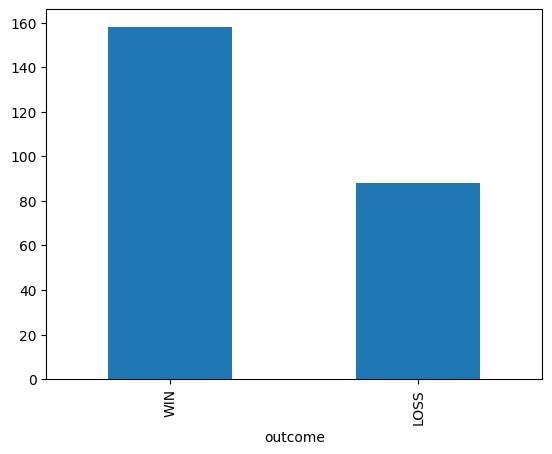

In [15]:
# Visualize the number of wins and losses for the regular season
cavaliers_regularseason_df['outcome'].value_counts().plot(kind='bar')

<Axes: xlabel='outcome'>

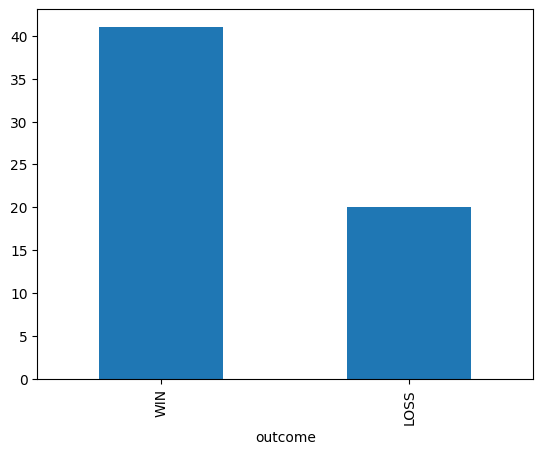

In [16]:
# Visualize the number of wins and losses for the postseason
cavaliers_postseason_df['outcome'].value_counts().plot(kind='bar')

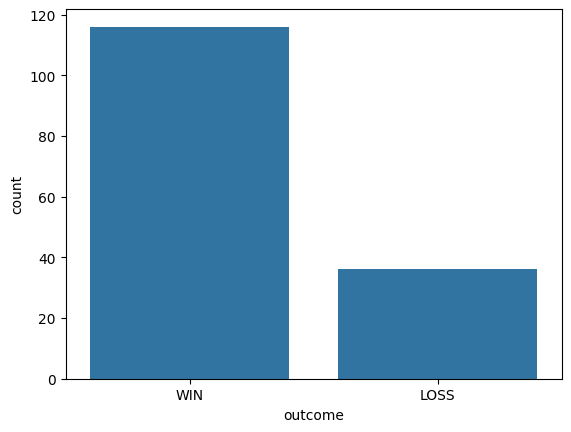

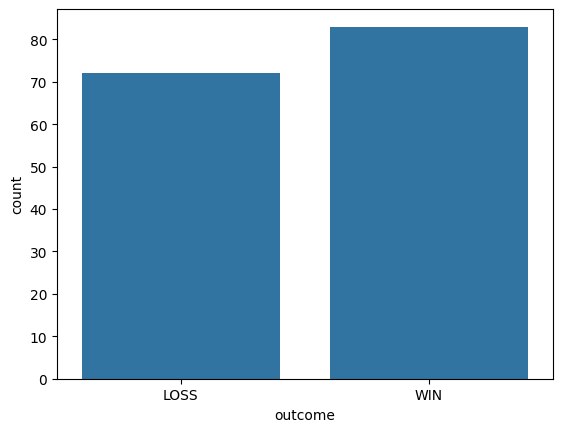

In [17]:
# Boxplot of the regular season home wins for the Cavaliers home games with id 6
import seaborn as sns
import matplotlib.pyplot as plt

# Count plot of the regular season home wins and losses for the Cavaliers home games with id 6
sns.countplot(data=cavaliers_df.loc[cavaliers_df['home_team.id'] == 6], x='outcome')
plt.show()
# Away games
sns.countplot(data=cavaliers_df.loc[cavaliers_df['visitor_team.id'] == 6], x='outcome')
plt.show()

<Axes: >

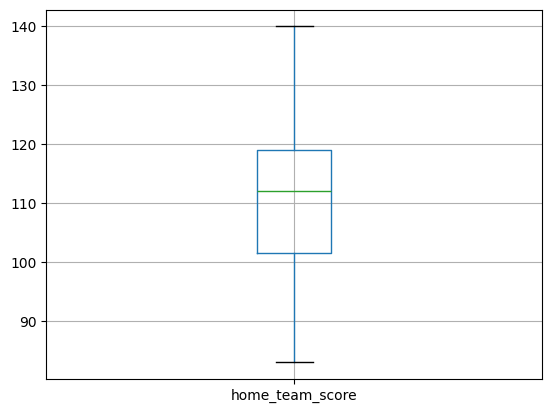

In [18]:
# Boxplot of the regular season scores for the Cavaliers home games with id 6
cavaliers_regularseason_df.loc[cavaliers_regularseason_df['home_team.id'] == 6].boxplot(column=['home_team_score'])

<Axes: >

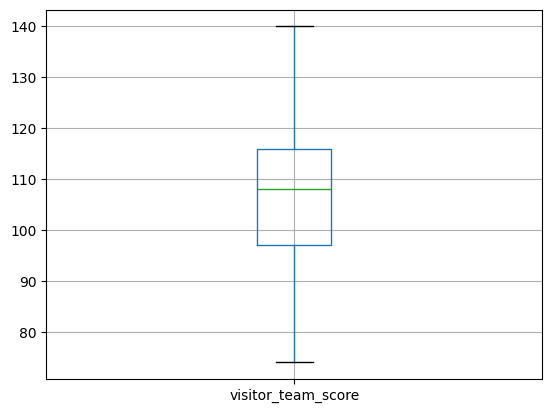

In [19]:
# Boxplot of the regular season scores for the Raptors away games with id 28
cavaliers_regularseason_df.loc[cavaliers_regularseason_df['visitor_team.id'] == 6].boxplot(column=['visitor_team_score'])

In [20]:
cavaliers_postseason_df

,id,date,home_team_score,period,postseason,season,status,visitor_team_score,home_team.id,home_team.abbreviation,...,visitor_team.id,visitor_team.abbreviation,visitor_team.city,visitor_team.conference,visitor_team.division,visitor_team.full_name,visitor_team.name,outcome,latitude,longitude
358,33876,2016-04-17,106,4,True,2015,Final,101,6,CLE,...,9,DET,Detroit,East,Central,Detroit Pistons,Pistons,WIN,41.496389,-81.688056
359,33879,2016-04-20,107,4,True,2015,Final,90,6,CLE,...,9,DET,Detroit,East,Central,Detroit Pistons,Pistons,WIN,41.496389,-81.688056
360,33881,2016-04-22,91,4,True,2015,Final,101,9,DET,...,6,CLE,Cleveland,East,Central,Cleveland Cavaliers,Cavaliers,WIN,42.341111,-83.055000
361,33883,2016-04-24,98,4,True,2015,Final,100,9,DET,...,6,CLE,Cleveland,East,Central,Cleveland Cavaliers,Cavaliers,WIN,42.341111,-83.055000
380,34016,2016-05-02,104,4,True,2015,Final,93,6,CLE,...,1,ATL,Atlanta,East,Southeast,Atlanta Hawks,Hawks,WIN,41.496389,-81.688056
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
402,33301,2018-05-27,79,4,True,2017,Final,87,2,BOS,...,6,CLE,Cleveland,East,Central,Cleveland Cavaliers,Cavaliers,WIN,42.366291,-71.062630
403,33719,2018-05-31,124,4,True,2017,Final,114,10,GSW,...,6,CLE,Cleveland,East,Central,Cleveland Cavaliers,Cavaliers,LOSS,37.768056,-122.387500
404,33720,2018-06-03,122,4,True,2017,Final,103,10,GSW,...,6,CLE,Cleveland,East,Central,Cleveland Cavaliers,Cavaliers,LOSS,37.768056,-122.387500
405,33721,2018-06-06,102,4,True,2017,Final,110,6,CLE,...,10,GSW,Golden State,West,Pacific,Golden State Warriors,Warriors,LOSS,41.496389,-81.688056


In [21]:
cavaliers_regularseason_df

,id,date,home_team_score,period,postseason,season,status,visitor_team_score,home_team.id,home_team.abbreviation,...,visitor_team.id,visitor_team.abbreviation,visitor_team.city,visitor_team.conference,visitor_team.division,visitor_team.full_name,visitor_team.name,outcome,latitude,longitude
62,31090,2015-10-27,97,4,False,2015,Final,95,5,CHI,...,6,CLE,Cleveland,East,Central,Cleveland Cavaliers,Cavaliers,LOSS,41.880692,-87.674370
63,31093,2015-10-28,76,4,False,2015,Final,106,15,MEM,...,6,CLE,Cleveland,East,Central,Cleveland Cavaliers,Cavaliers,WIN,35.138056,-90.050556
28,28882,2015-10-30,102,4,False,2015,Final,92,6,CLE,...,16,MIA,Miami,East,Southeast,Miami Heat,Heat,WIN,41.496389,-81.688056
26,28664,2015-11-02,100,4,False,2015,Final,107,23,PHI,...,6,CLE,Cleveland,East,Central,Cleveland Cavaliers,Cavaliers,WIN,39.901111,-75.171944
27,28666,2015-11-04,96,4,False,2015,Final,86,6,CLE,...,20,NYK,New York,East,Atlantic,New York Knicks,Knicks,WIN,41.496389,-81.688056
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
323,34530,2018-04-03,112,4,False,2017,Final,106,6,CLE,...,28,TOR,Toronto,East,Atlantic,Toronto Raptors,Raptors,WIN,41.496389,-81.688056
324,34534,2018-04-05,119,4,False,2017,Final,115,6,CLE,...,30,WAS,Washington,East,Southeast,Washington Wizards,Wizards,WIN,41.496389,-81.688056
309,33713,2018-04-06,132,4,False,2017,Final,130,23,PHI,...,6,CLE,Cleveland,East,Central,Cleveland Cavaliers,Cavaliers,LOSS,39.901111,-75.171944
334,34955,2018-04-09,109,4,False,2017,Final,123,20,NYK,...,6,CLE,Cleveland,East,Central,Cleveland Cavaliers,Cavaliers,WIN,40.750556,-73.993611


In [22]:
# Convert to csv files
cavaliers_regularseason_df.to_csv('cavaliers_regularseason.csv', index=False)
cavaliers_postseason_df.to_csv('cavaliers_postseason.csv', index=False)

In [23]:
import requests
import pandas as pd
import time

def gather_team_stats(team_id):
    url = "https://www.balldontlie.io/api/v1/stats"
    params = {
        'seasons[]': ['2015', '2016', '2017'],
        'team_ids[]': [str(team_id)],  
        'per_page': '100',  
    }

    all_stats = []
    page = 0

    while True:
        params['page'] = page
        response = requests.get(url, params=params)

        if response.status_code == 429:  # Rate limit encountered
            print("Rate limit reached. Waiting 60 seconds to continue...")
            time.sleep(60)  # Wait for 60 seconds
            continue  # Retry the same request
        elif response.status_code != 200:
            print(f"Failed to retrieve data: {response.status_code}")
            break
        
        data = response.json()
        all_stats.extend([item for item in data['data'] if item['team']['id'] == team_id])

        if not data['meta']['next_page']:
            break
        
        page += 1
        # sleep between successful requests to avoid hitting the rate limit
        time.sleep(1)  # Wait for 1 second before the next page request

    return all_stats  

cavs_stats2 = gather_team_stats(6)
cavs_stats_df = pd.json_normalize(cavs_stats2)
cavs_stats_df

,id,ast,blk,dreb,fg3_pct,fg3a,fg3m,fg_pct,fga,fgm,...,player.position,player.team_id,player.weight_pounds,team.id,team.abbreviation,team.city,team.conference,team.division,team.full_name,team.name
0,748873,2.0,0.0,3.0,0.000,7.0,0.0,0.333,18.0,6.0,...,,3,NaN,6,CLE,Cleveland,East,Central,Cleveland Cavaliers,Cavaliers
1,748874,2.0,0.0,5.0,0.000,4.0,0.0,0.182,11.0,2.0,...,F-C,16,251.0,6,CLE,Cleveland,East,Central,Cleveland Cavaliers,Cavaliers
2,748875,0.0,0.0,4.0,0.000,0.0,0.0,0.667,6.0,4.0,...,C,22,275.0,6,CLE,Cleveland,East,Central,Cleveland Cavaliers,Cavaliers
3,748876,2.0,0.0,0.0,0.200,5.0,1.0,0.333,12.0,4.0,...,G-F,14,225.0,6,CLE,Cleveland,East,Central,Cleveland Cavaliers,Cavaliers
4,748877,5.0,1.0,2.0,0.333,3.0,1.0,0.364,11.0,4.0,...,G,26,200.0,6,CLE,Cleveland,East,Central,Cleveland Cavaliers,Cavaliers
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4076,811812,0.0,0.0,0.0,0.400,5.0,2.0,0.500,6.0,3.0,...,G-F,17,212.0,6,CLE,Cleveland,East,Central,Cleveland Cavaliers,Cavaliers
4077,811813,4.0,1.0,3.0,0.000,1.0,0.0,0.250,4.0,1.0,...,G,16,220.0,6,CLE,Cleveland,East,Central,Cleveland Cavaliers,Cavaliers
4078,811814,0.0,0.0,2.0,0.500,2.0,1.0,0.333,3.0,1.0,...,F-C,6,255.0,6,CLE,Cleveland,East,Central,Cleveland Cavaliers,Cavaliers
4079,811815,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,G,9,200.0,6,CLE,Cleveland,East,Central,Cleveland Cavaliers,Cavaliers


In [24]:
cavs_stats_df.dtypes

id                           int64
ast                        float64
blk                        float64
dreb                       float64
fg3_pct                    float64
fg3a                       float64
fg3m                       float64
fg_pct                     float64
fga                        float64
fgm                        float64
ft_pct                     float64
fta                        float64
ftm                        float64
min                         object
oreb                       float64
pf                         float64
pts                        float64
reb                        float64
stl                        float64
turnover                   float64
game.id                      int64
game.date                   object
game.home_team_id            int64
game.home_team_score         int64
game.period                  int64
game.postseason               bool
game.season                  int64
game.status                 object
game.time           

In [25]:
# Change date to datetime
cavs_stats_df['game.date'] = pd.to_datetime(cavs_stats_df['game.date']).dt.date
cavs_stats_df['game.date'] = pd.to_datetime(cavs_stats_df['game.date']).dt.normalize()


In [27]:
# Order by date
cavs_stats_df = cavs_stats_df.sort_values(by=['game.date'])
cavs_stats_df['game.date']

4011   2015-10-27
4017   2015-10-27
4014   2015-10-27
4013   2015-10-27
4012   2015-10-27
          ...    
3276   2018-06-08
3277   2018-06-08
3278   2018-06-08
2381   2018-06-08
2383   2018-06-08
Name: game.date, Length: 4081, dtype: datetime64[ns]

In [31]:
# Look for duplicate rows
cavs_stats_df.duplicated().sum()

1522

In [32]:
# Remove duplicate rows
cavs_stats_df = cavs_stats_df.drop_duplicates()

In [33]:
# Look for nan values
cavs_stats_df.isna().sum()

id                           0
ast                        410
blk                        410
dreb                       410
fg3_pct                    410
fg3a                       410
fg3m                       410
fg_pct                     410
fga                        410
fgm                        410
ft_pct                     410
fta                        410
ftm                        410
min                        410
oreb                       410
pf                         410
pts                        410
reb                        410
stl                        410
turnover                   410
game.id                      0
game.date                    0
game.home_team_id            0
game.home_team_score         0
game.period                  0
game.postseason              0
game.season                  0
game.status                  0
game.time                    0
game.visitor_team_id         0
game.visitor_team_score      0
player.id                    0
player.f

In [34]:
# Remove nan values
cavs_stats_df = cavs_stats_df.dropna()

In [35]:
# Look for empty values
cavs_stats_df.isin(['']).sum()

id                         0
ast                        0
blk                        0
dreb                       0
fg3_pct                    0
fg3a                       0
fg3m                       0
fg_pct                     0
fga                        0
fgm                        0
ft_pct                     0
fta                        0
ftm                        0
min                        0
oreb                       0
pf                         0
pts                        0
reb                        0
stl                        0
turnover                   0
game.id                    0
game.date                  0
game.home_team_id          0
game.home_team_score       0
game.period                0
game.postseason            0
game.season                0
game.status                0
game.time                  0
game.visitor_team_id       0
game.visitor_team_score    0
player.id                  0
player.first_name          0
player.height_feet         0
player.height_

In [36]:
cavs_stats_df.columns

Index(['id', 'ast', 'blk', 'dreb', 'fg3_pct', 'fg3a', 'fg3m', 'fg_pct', 'fga',
       'fgm', 'ft_pct', 'fta', 'ftm', 'min', 'oreb', 'pf', 'pts', 'reb', 'stl',
       'turnover', 'game.id', 'game.date', 'game.home_team_id',
       'game.home_team_score', 'game.period', 'game.postseason', 'game.season',
       'game.status', 'game.time', 'game.visitor_team_id',
       'game.visitor_team_score', 'player.id', 'player.first_name',
       'player.height_feet', 'player.height_inches', 'player.last_name',
       'player.position', 'player.team_id', 'player.weight_pounds', 'team.id',
       'team.abbreviation', 'team.city', 'team.conference', 'team.division',
       'team.full_name', 'team.name'],
      dtype='object')

In [37]:
# Drop unnecessary columns
cavs_stats_df = cavs_stats_df.drop(columns=['player.height_feet', 'player.height_inches', 'team.conference', 'team.division', 'team.full_name'])

In [38]:
cavs_stats_df

,id,ast,blk,dreb,fg3_pct,fg3a,fg3m,fg_pct,fga,fgm,...,player.id,player.first_name,player.last_name,player.position,player.team_id,player.weight_pounds,team.id,team.abbreviation,team.city,team.name
4013,741155,4.0,0.0,3.0,0.000,2.0,0.0,0.375,8.0,3.0,...,123,Matthew,Dellavedova,G,26,200.0,6,CLE,Cleveland,Cavaliers
4012,741154,0.0,0.0,10.0,0.000,0.0,0.0,0.250,4.0,1.0,...,444,Tristan,Thompson,C-F,6,238.0,6,CLE,Cleveland,Cavaliers
4009,741151,3.0,0.0,4.0,0.000,2.0,0.0,0.300,10.0,3.0,...,424,JR,Smith,G-F,14,225.0,6,CLE,Cleveland,Cavaliers
4008,741150,2.0,2.0,3.0,0.000,0.0,0.0,0.333,6.0,2.0,...,332,Timofey,Mozgov,C,22,275.0,6,CLE,Cleveland,Cavaliers
4007,741149,4.0,2.0,4.0,0.429,7.0,3.0,0.353,17.0,6.0,...,285,Kevin,Love,F-C,16,251.0,6,CLE,Cleveland,Cavaliers
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2387,841659,1.0,1.0,0.0,0.333,3.0,1.0,0.250,8.0,2.0,...,188,Jeff,Green,F,11,235.0,6,CLE,Cleveland,Cavaliers
2384,841656,1.0,0.0,2.0,0.600,5.0,3.0,0.375,8.0,3.0,...,424,JR,Smith,G-F,14,225.0,6,CLE,Cleveland,Cavaliers
2382,841654,2.0,0.0,6.0,0.400,5.0,2.0,0.308,13.0,4.0,...,285,Kevin,Love,F-C,16,251.0,6,CLE,Cleveland,Cavaliers
3275,841653,8.0,1.0,6.0,0.000,1.0,0.0,0.538,13.0,7.0,...,237,LeBron,James,F,14,250.0,6,CLE,Cleveland,Cavaliers


In [46]:
cavs_stats_df.loc[cavs_stats_df['game.visitor_team_id'] == '28'].groupby('game.date')['fg_pct'].sum()

Series([], Name: fg_pct, dtype: float64)

In [51]:
# game.home_team_id == 28 is the Raptors
cavs_stats_df.loc[cavs_stats_df['game.home_team_id'] == '28']

,id,ast,blk,dreb,fg3_pct,fg3a,fg3m,fg_pct,fga,fgm,...,player.id,player.first_name,player.last_name,player.position,player.team_id,player.weight_pounds,team.id,team.abbreviation,team.city,team.name


In [57]:
# Raptors vs Cavaliers Playoff Games 2018 
cavs_stats_df.loc[cavs_stats_df['game.date'] == '2018-05-03']

,id,ast,blk,dreb,fg3_pct,fg3a,fg3m,fg_pct,fga,fgm,...,player.id,player.first_name,player.last_name,player.position,player.team_id,player.weight_pounds,team.id,team.abbreviation,team.city,team.name
3592,840935,0.0,0.0,2.0,0.000,0.0,0.0,1.000,1.0,1.0,...,444,Tristan,Thompson,C-F,6,238.0,6,CLE,Cleveland,Cavaliers
3591,840934,2.0,0.0,2.0,0.000,2.0,0.0,0.625,8.0,5.0,...,211,George,Hill,G,12,188.0,6,CLE,Cleveland,Cavaliers
3590,840933,2.0,0.0,2.0,0.500,2.0,1.0,0.667,3.0,2.0,...,262,Kyle,Korver,G-F,17,212.0,6,CLE,Cleveland,Cavaliers
3589,840932,2.0,1.0,10.0,0.333,6.0,2.0,0.524,21.0,11.0,...,285,Kevin,Love,F-C,16,251.0,6,CLE,Cleveland,Cavaliers
2248,840939,0.0,0.0,1.0,0.000,0.0,0.0,0.000,0.0,0.0,...,340,Larry,Nance Jr.,F,19,230.0,6,CLE,Cleveland,Cavaliers
3594,840937,3.0,0.0,3.0,0.000,0.0,0.0,0.000,2.0,0.0,...,218,Rodney,Hood,G,13,206.0,6,CLE,Cleveland,Cavaliers
2249,840940,0.0,0.0,0.0,0.000,0.0,0.0,0.000,0.0,0.0,...,359,Cedi,Osman,F,27,215.0,6,CLE,Cleveland,Cavaliers
2247,840938,0.0,0.0,1.0,0.250,4.0,1.0,0.400,5.0,2.0,...,100,Jordan,Clarkson,G,29,194.0,6,CLE,Cleveland,Cavaliers
3593,840936,1.0,2.0,1.0,0.667,6.0,4.0,0.625,8.0,5.0,...,188,Jeff,Green,F,11,235.0,6,CLE,Cleveland,Cavaliers
2981,840931,14.0,0.0,7.0,0.333,3.0,1.0,0.679,28.0,19.0,...,237,LeBron,James,F,14,250.0,6,CLE,Cleveland,Cavaliers


In [60]:
# Find the game.home_team_id for the specific date of 2018-05-03
cavs_stats_df.loc[cavs_stats_df['game.date'] == '2018-05-03']['game.home_team_id']



3592    28
3591    28
3590    28
3589    28
2248    28
3594    28
2249    28
2247    28
3593    28
2981    28
3587    28
Name: game.home_team_id, dtype: int64

In [66]:
# Check points per game sum for the Cavaliers
cavs_stats_df.loc[cavs_stats_df['team.name'] == 'Cavaliers'].groupby('game.date')['pts'].sum()

game.date
2015-10-27     64.0
2015-10-28     64.0
2015-10-30     85.0
2015-11-02     63.0
2015-11-04     59.0
              ...  
2018-05-27     87.0
2018-05-31    114.0
2018-06-03    103.0
2018-06-06    102.0
2018-06-08     85.0
Name: pts, Length: 215, dtype: float64

<Axes: xlabel='game.date'>

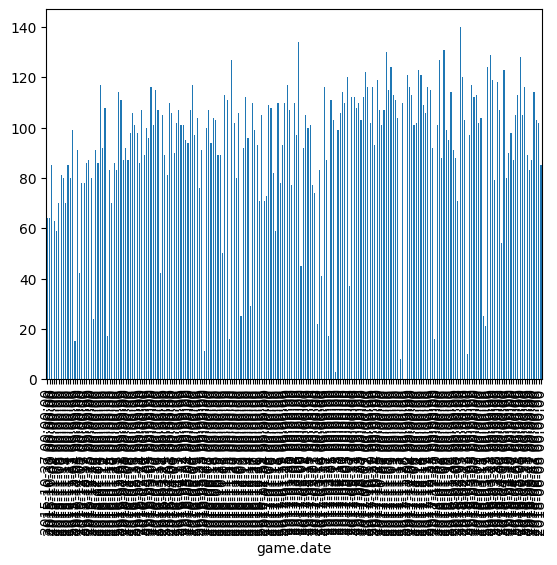

In [67]:
# Bar Graph of the Cavaliers points per game
cavs_stats_df.loc[cavs_stats_df['team.name'] == 'Cavaliers'].groupby('game.date')['pts'].sum().plot(kind='bar')

<Axes: >

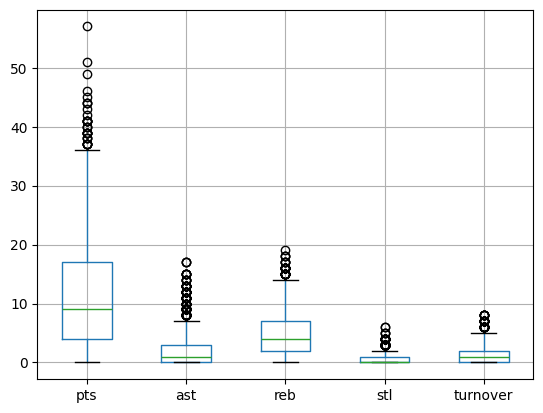

In [73]:
# Average points/assist/rebounds/steals/turnovers per game for the Cavaliers, boxplot
cavs_stats_df.loc[cavs_stats_df['team.name'] == 'Cavaliers'].boxplot(column=['pts', 'ast', 'reb', 'stl', 'turnover'])

<Axes: >

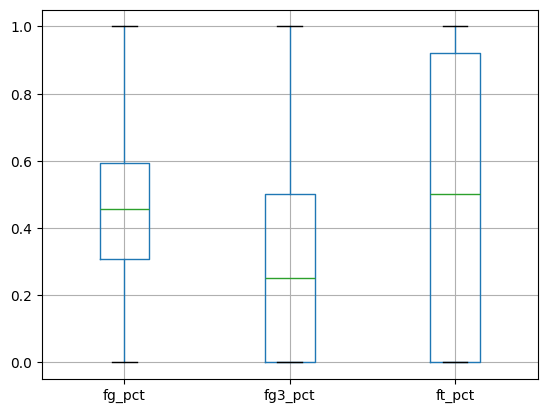

In [72]:
# Average Field Goal Percentage, Shooting Percentage, and Free Throw Percentage for the Cavaliers Boxplot
cavs_stats_df.loc[cavs_stats_df['team.name'] == 'Cavaliers'].boxplot(column=['fg_pct', 'fg3_pct', 'ft_pct'])

In [62]:
# Convert to csv file
cavs_stats_df.to_csv('cavs_stats.csv', index=False)